# Figure 2c: Co 0-->1 Timepoint Graph
## Import Modules

In [40]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

from turtles.turtles_utils import *

## Set Filepaths

In [25]:
#: Overall directory for TdT project data and analysis
tdt_dir = '/mnt/c/Users/jonst/Box Sync/All_dNTP_data/'

#: Subdirectory for NGS run
data_dir = tdt_dir + 'Data_and_Results/All_Data_Filtered_Trimmed/Co_01_paired_simple_cut/'

#: Filename prefixes for 0 control conditions
zero_control_conds = ['Namita_23630_Mg_Col_T0_1-167005853',
                      'Namita_23630_Mg_Col_T0_2-166999859',
                      'Namita_23630_Mg_Col_T0_3-167009845']

#: Filename prefixes for 1 control conditions
one_control_conds = ['Namita_23630_Cobalt_Col_T0_1-167010847',
                     'Namita_23630_Cobalt_Col_T0_2-166993853',
                     'Namita_23630_Cobalt_Col_T0_3-166999858']

#: suffix of R1 fastq file to read in each directory
filename_end = 'trimmed.fq'

#: Directory to save generated figures in - it gets created if not present already
figure_dir = tdt_dir + 'turtles/figures/'
os.makedirs(os.path.dirname(figure_dir), exist_ok=True)

## Load Sequences

In [3]:
seqs_dict = read_seqs(data_dir, filename_end=filename_end, cutoff=5.8)

Loading Namita_23630_Cobalt_Col_10_min_1-166999856
Read 543724 sequences...

Loading Namita_23630_Cobalt_Col_10_min_2-167010846
Read 713786 sequences...

Loading Namita_23630_Cobalt_Col_10_min_3-167008844
Read 781199 sequences...

Loading Namita_23630_Cobalt_Col_20_min_1-167006850
Read 634854 sequences...

Loading Namita_23630_Cobalt_Col_20_min_2-166996865
Read 618589 sequences...

Loading Namita_23630_Cobalt_Col_20_min_3-166999857
Read 623927 sequences...

Loading Namita_23630_Cobalt_Col_45_min_1-166996866
Read 620758 sequences...

Loading Namita_23630_Cobalt_Col_45_min_2-167009844
Read 578837 sequences...

Loading Namita_23630_Cobalt_Col_45_min_3-166992854
Read 556232 sequences...

Loading Namita_23630_Cobalt_Col_T0_1-167010847
Read 632005 sequences...

Loading Namita_23630_Cobalt_Col_T0_2-166993853
Read 517898 sequences...

Loading Namita_23630_Cobalt_Col_T0_3-166999858
Read 613767 sequences...

Loading Namita_23630_Mg_Col_T0_1-167005853
Read 611651 sequences...

Loading Namita_2363

## Choose Legend Labels for Plotting
### Condition Labels

In [4]:
condition_dict = {}
conditions = seqs_dict.keys()
for condition in conditions:
    cond = condition[:10]
    if 'Cobalt_Col_T0' in condition:
        condition_dict[condition] = '1 Control'
    elif 'Cobalt_Col_10_min' in condition:
        condition_dict[condition] = '01 at 10 min'
    elif 'Cobalt_Col_20_min' in condition:
        condition_dict[condition] = '01 at 20 min'
    elif 'Cobalt_Col_45_min' in condition:
        condition_dict[condition] = '01 at 45 min'
    elif 'Mg_Col_T0' in condition:
        condition_dict[condition] = '0 Control'
    elif 'NoTdT' in condition:
        condition_dict[condition] = 'No TdT Control'
    else:
        print(condition, 'not recognized.')

### Replicate Labels

In [5]:
rep_dict = {}
for condition in conditions:
    if 'NoTdT' in condition:
        rep_dict[condition] = 1
    else:
        rep_dict[condition] = condition[-11]

## Bin Sequences, Calculate dNTP Frequency, and Transform into Aitchison Space
Note: Binning can take a while.

In [6]:
counts_dict = get_norm_len_base_counts(seqs_dict, num_bins=1000)

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed



In [7]:
pcts_dict = calc_norm_len_base_pcts(counts_dict)

In [8]:
clr_data = calc_aitchison_distance(pcts_dict)

## Calculate and Plot Timepoint Results
### Convert Data into Long-Form pandas DataFrame

In [9]:
data = generate_aitch_df(pcts_dict, clr_data, condition_dict, rep_dict,
                         zero_control_conds, one_control_conds)
data.head()

,Directory,Condition,Replicate,Bin Number,Aitch Dist (from 0),Aitch Dist (from 1),A % Aitch,C % Aitch,G % Aitch,T % Aitch,...,G % Aitch Diff from 0,T % Aitch Diff from 0,A % Aitch Diff from 1,C % Aitch Diff from 1,G % Aitch Diff from 1,T % Aitch Diff from 1,A %,C %,G %,T %
0,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,1,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.011283,0.033401,0.494214,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682
1,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,2,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.011283,0.033401,0.494214,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682
2,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,3,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.011283,0.033401,0.494214,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682
3,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,4,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.011283,0.033401,0.494214,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682
4,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,5,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.011283,0.033401,0.494214,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682


In [10]:
data = calc_signal(data, zero_control_conds, one_control_conds)
data.head()

,Directory,Condition,Replicate,Bin Number,Aitch Dist (from 0),Aitch Dist (from 1),A % Aitch,C % Aitch,G % Aitch,T % Aitch,...,A % Aitch Diff from 1,C % Aitch Diff from 1,G % Aitch Diff from 1,T % Aitch Diff from 1,A %,C %,G %,T %,Aitch Fraction,Signal
0,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,1,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.494214,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682,0.08288,0.064781
1,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,2,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.494214,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682,0.08288,0.064781
2,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,3,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.494214,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682,0.08288,0.064781
3,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,4,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.494214,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682,0.08288,0.064781
4,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,5,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.494214,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682,0.08288,0.064781


### Calculate Switch Times

In [11]:
len_dists = get_length_dists(seqs_dict)
averages = parse_fastq_lengths(len_dists, expt_time=60)
averages

,Directory,Mean,Std Devs,Rate (nt/min)
0,Namita_23630_Cobalt_Col_10_min_1-166999856,15.771625,9.746297,0.262860
1,Namita_23630_Cobalt_Col_10_min_2-167010846,16.281955,9.728664,0.271366
2,Namita_23630_Cobalt_Col_10_min_3-167008844,16.467331,9.901236,0.274456
3,Namita_23630_Cobalt_Col_20_min_1-167006850,15.784165,10.034090,0.263069
4,Namita_23630_Cobalt_Col_20_min_2-166996865,16.597539,10.148654,0.276626
5,Namita_23630_Cobalt_Col_20_min_3-166999857,14.303013,9.520962,0.238384
6,Namita_23630_Cobalt_Col_45_min_1-166996866,15.085116,9.723377,0.251419
7,Namita_23630_Cobalt_Col_45_min_2-167009844,13.702536,9.407199,0.228376
8,Namita_23630_Cobalt_Col_45_min_3-166992854,14.673196,9.698377,0.244553
9,Namita_23630_Cobalt_Col_T0_1-167010847,16.445311,10.130159,0.274089


In [12]:
averages = calc_switch_bins(averages, data, mode='01')
averages

,Directory,Mean,Std Devs,Rate (nt/min),Switch Bin
0,Namita_23630_Cobalt_Col_10_min_1-166999856,15.771625,9.746297,0.262860,182.613856
1,Namita_23630_Cobalt_Col_10_min_2-167010846,16.281955,9.728664,0.271366,167.301215
2,Namita_23630_Cobalt_Col_10_min_3-167008844,16.467331,9.901236,0.274456,188.682761
3,Namita_23630_Cobalt_Col_20_min_1-167006850,15.784165,10.034090,0.263069,400.304282
4,Namita_23630_Cobalt_Col_20_min_2-166996865,16.597539,10.148654,0.276626,364.320250
5,Namita_23630_Cobalt_Col_20_min_3-166999857,14.303013,9.520962,0.238384,375.206357
6,Namita_23630_Cobalt_Col_45_min_1-166996866,15.085116,9.723377,0.251419,788.551460
7,Namita_23630_Cobalt_Col_45_min_2-167009844,13.702536,9.407199,0.228376,800.265261
8,Namita_23630_Cobalt_Col_45_min_3-166992854,14.673196,9.698377,0.244553,819.226255
9,Namita_23630_Cobalt_Col_T0_1-167010847,16.445311,10.130159,0.274089,NaN


In [13]:
averages = calc_switch_times(averages, num_bins=1000, start_control_conds=zero_control_conds,
                             end_control_conds=one_control_conds, t_expt=60)
averages

,Directory,Mean,Std Devs,Rate (nt/min),Switch Bin,Switch Time
0,Namita_23630_Cobalt_Col_10_min_1-166999856,15.771625,9.746297,0.262860,182.613856,11.996575
1,Namita_23630_Cobalt_Col_10_min_2-167010846,16.281955,9.728664,0.271366,167.301215,11.010204
2,Namita_23630_Cobalt_Col_10_min_3-167008844,16.467331,9.901236,0.274456,188.682761,12.386537
3,Namita_23630_Cobalt_Col_20_min_1-167006850,15.784165,10.034090,0.263069,400.304282,25.649231
4,Namita_23630_Cobalt_Col_20_min_2-166996865,16.597539,10.148654,0.276626,364.320250,23.439083
5,Namita_23630_Cobalt_Col_20_min_3-166999857,14.303013,9.520962,0.238384,375.206357,24.109616
6,Namita_23630_Cobalt_Col_45_min_1-166996866,15.085116,9.723377,0.251419,788.551460,48.398202
7,Namita_23630_Cobalt_Col_45_min_2-167009844,13.702536,9.407199,0.228376,800.265261,49.054824
8,Namita_23630_Cobalt_Col_45_min_3-166992854,14.673196,9.698377,0.244553,819.226255,50.114164
9,Namita_23630_Cobalt_Col_T0_1-167010847,16.445311,10.130159,0.274089,NaN,NaN


In [14]:
# Make sure there aren't switch times for controls or things will look weird when we convert bin to time
averages.loc[averages.Directory == 'Namita_23630_Cobalt_Col_T0_3-166999858', 'Switch Time'] = None
averages

,Directory,Mean,Std Devs,Rate (nt/min),Switch Bin,Switch Time
0,Namita_23630_Cobalt_Col_10_min_1-166999856,15.771625,9.746297,0.262860,182.613856,11.996575
1,Namita_23630_Cobalt_Col_10_min_2-167010846,16.281955,9.728664,0.271366,167.301215,11.010204
2,Namita_23630_Cobalt_Col_10_min_3-167008844,16.467331,9.901236,0.274456,188.682761,12.386537
3,Namita_23630_Cobalt_Col_20_min_1-167006850,15.784165,10.034090,0.263069,400.304282,25.649231
4,Namita_23630_Cobalt_Col_20_min_2-166996865,16.597539,10.148654,0.276626,364.320250,23.439083
5,Namita_23630_Cobalt_Col_20_min_3-166999857,14.303013,9.520962,0.238384,375.206357,24.109616
6,Namita_23630_Cobalt_Col_45_min_1-166996866,15.085116,9.723377,0.251419,788.551460,48.398202
7,Namita_23630_Cobalt_Col_45_min_2-167009844,13.702536,9.407199,0.228376,800.265261,49.054824
8,Namita_23630_Cobalt_Col_45_min_3-166992854,14.673196,9.698377,0.244553,819.226255,50.114164
9,Namita_23630_Cobalt_Col_T0_1-167010847,16.445311,10.130159,0.274089,NaN,NaN


In [32]:
print('Switch Time Averages (Figure 2d)')
avgs = [averages['Switch Time'][0:3].mean(),
        averages['Switch Time'][3:6].mean(),
        averages['Switch Time'][6:9].mean()]
avgs

Switch Time Averages (Figure 2d)


[11.797772010197397, 24.399309759725767, 49.189063388312015]

In [33]:
print('Switch Time Standard Deviations (Figure 2d)')
stds = [averages['Switch Time'][0:3].std(),
        averages['Switch Time'][3:6].std(),
        averages['Switch Time'][6:9].std()]
stds

Switch Time Standard Deviations (Figure 2d)


[0.7093760959598818, 1.1331949313983485, 0.8658213228532]

In [34]:
switch_times = pd.DataFrame()
switch_times['Time'] = [10, 20, 45]
switch_times['Predicted Time Average'] = avgs
switch_times['Predicted Time Std Dev'] = stds
switch_times

,Time,Predicted Time Average,Predicted Time Std Dev
0,10,11.797772,0.709376
1,20,24.399310,1.133195
2,45,49.189063,0.865821


In [38]:
switch_times.to_csv(figure_dir + '/Co_01_Predictions.csv', index=False)

# Convert bin number to time

In [17]:
data.head()

,Directory,Condition,Replicate,Bin Number,Aitch Dist (from 0),Aitch Dist (from 1),A % Aitch,C % Aitch,G % Aitch,T % Aitch,...,A % Aitch Diff from 1,C % Aitch Diff from 1,G % Aitch Diff from 1,T % Aitch Diff from 1,A %,C %,G %,T %,Aitch Fraction,Signal
0,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,1,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.494214,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682,0.08288,0.064781
1,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,2,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.494214,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682,0.08288,0.064781
2,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,3,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.494214,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682,0.08288,0.064781
3,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,4,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.494214,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682,0.08288,0.064781
4,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,5,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.494214,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682,0.08288,0.064781


In [18]:
def convert_bins_to_times(switch_bin, n_bins, switch_time, t_expt):
    times = []
    for bin_i in range(n_bins):
        if not np.isnan(switch_time):
            if bin_i < switch_bin:
                time_i = ((bin_i) / (switch_bin)) * (switch_time)
            else:
                time_i = ((bin_i - switch_bin) / (n_bins - switch_bin)) * (t_expt - switch_time) + switch_time
        else:
            time_i = (bin_i / n_bins) * t_expt
        times.append(time_i)
    return times

In [19]:
data['Time'] = None
texpt = 60

switch_bins = [averages['Switch Bin'][0:3].mean()] * 3 \
              + [averages['Switch Bin'][3:6].mean()] * 3 \
              + [averages['Switch Bin'][6:9].mean()] * 3 \
              + [np.nan] * 6
switch_times = [averages['Switch Time'][0:3].mean()] * 3 \
               + [averages['Switch Time'][3:6].mean()] * 3 \
               + [averages['Switch Time'][6:9].mean()] * 3 \
               + [np.nan] * 6

for directory, switch_bin, switch_time in zip(averages['Directory'],
                                              switch_bins,
                                              switch_times):
    data.loc[data.Directory == directory, 'Time'] = convert_bins_to_times(switch_bin, 1000, switch_time, texpt)

In [26]:
data.head()

,Directory,Condition,Replicate,Bin Number,Aitch Dist (from 0),Aitch Dist (from 1),A % Aitch,C % Aitch,G % Aitch,T % Aitch,...,C % Aitch Diff from 1,G % Aitch Diff from 1,T % Aitch Diff from 1,A %,C %,G %,T %,Aitch Fraction,Signal,Time
0,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,1,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682,0.08288,0.064781,0.0
1,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,2,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682,0.08288,0.064781,0.065714
2,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,3,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682,0.08288,0.064781,0.131428
3,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,4,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682,0.08288,0.064781,0.197141
4,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,5,0.051999,0.575402,0.01171,-0.298208,0.840508,-0.554009,...,0.105918,0.20497,0.183326,0.217769,0.159735,0.498814,0.123682,0.08288,0.064781,0.262855


### Plot Timepoint Results
Note: plotting can take a while if a lot of bins are used.

In [27]:
sns.set(style='white', font='times-new-roman', font_scale=2, rc={'lines.linewidth': 5})
mpl.rc('font',family='Times New Roman')

In [28]:
colors = [(128/255, 199/255, 224/255),  # 10 min
          (41/255, 171/255, 226/255),   # 20 min
          (0/255, 113/255, 188/255),    # 45 min
          (241/255, 90/255, 36/255),    # 1 control
          (119/255, 178/255, 150/255)]  # 0 control
sns.set_palette(sns.color_palette(colors))

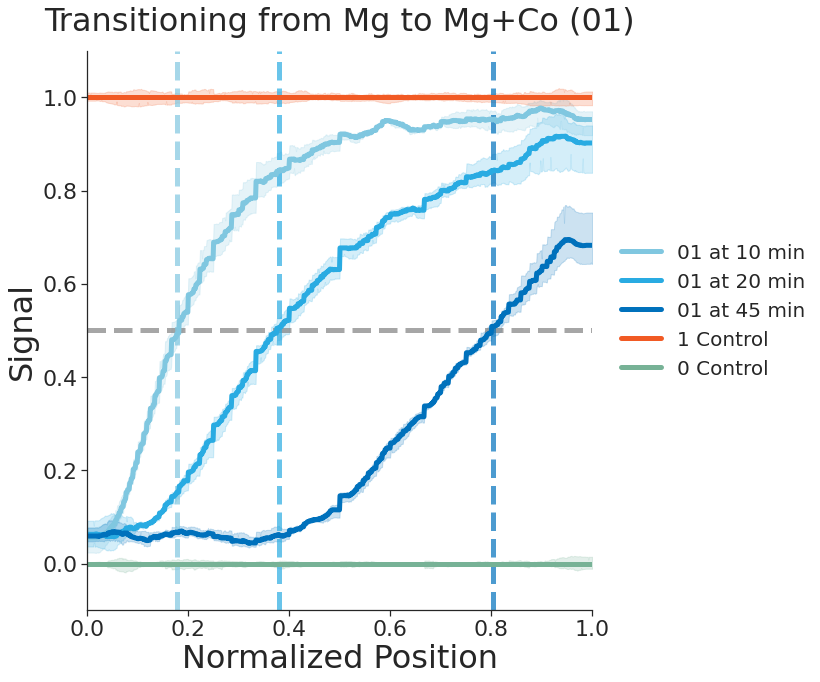

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

num_bins = 1000

ax.axhline(0.5, color='0.5', alpha=0.7, ls='--')

# Add switch bins
ax.axvline(averages.iloc[0:3, 4].mean(), color=sns.color_palette()[0], alpha=.7, ls='--')
ax.axvline(averages.iloc[3:6, 4].mean(), color=sns.color_palette()[1], alpha=.7, ls='--')
ax.axvline(averages.iloc[6:9, 4].mean(), color=sns.color_palette()[2], alpha=.7, ls='--')

sns.lineplot(x='Bin Number', y='Signal', hue='Condition',
             data=data[data.Condition != 'No TdT Control'], ax=ax)

ax.legend(loc=(1.04, 0.4), fontsize=20, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xlim(0, num_bins)
ax.set_xticks(range(0, num_bins + 1, int(num_bins / 5)))
ax.set_xticklabels(np.arange(0, 1.1, 0.2, dtype=np.float32))
ax.set_xlabel('Normalized Position', fontsize=32)
ax.set_ylabel('Signal', fontsize=32)
ax.set_ylim(-0.1, 1.1)
ax.set_title('Transitioning from Mg to Mg+Co (01)', fontsize=32, pad=20)

plt.tight_layout()
fig.savefig(figure_dir + 'Co_01_Timepoint_Norm')
fig.savefig(figure_dir + 'Co_01_Timepoint_Norm.svg')
plt.show()

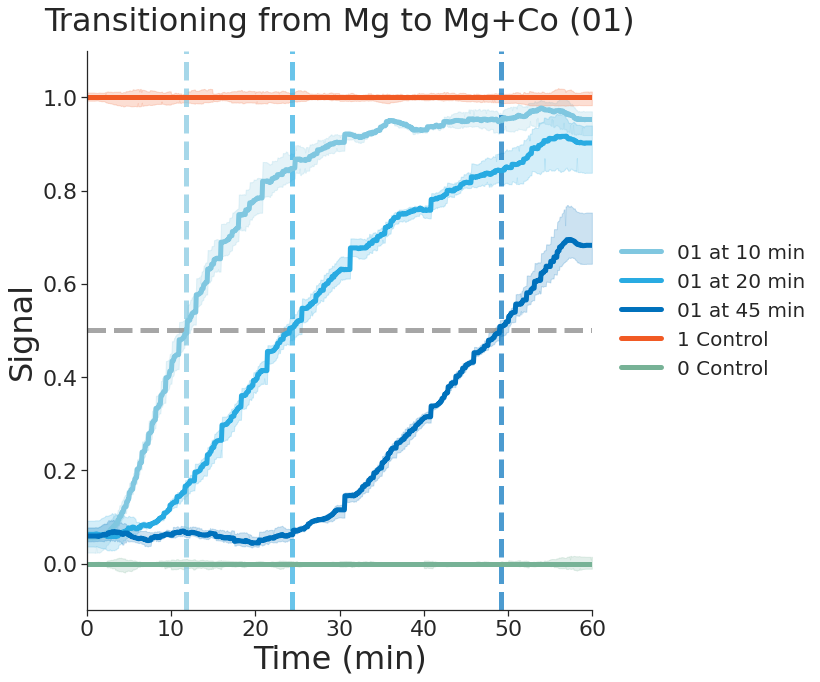

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

texpt = 60

ax.axhline(0.5, color='0.5', alpha=0.7, ls='--')

# Add switch times
ax.axvline(averages.iloc[0:3, 5].mean(), color=sns.color_palette()[0], alpha=.7, ls='--')
ax.axvline(averages.iloc[3:6, 5].mean(), color=sns.color_palette()[1], alpha=.7, ls='--')
ax.axvline(averages.iloc[6:9, 5].mean(), color=sns.color_palette()[2], alpha=.7, ls='--')

sns.lineplot(x='Time', y='Signal', hue='Condition',
             data=data[data.Condition != 'No TdT Control'], ax=ax)

ax.legend(loc=(1.04, 0.4), fontsize=20, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xlim(0, texpt)
ax.set_xticks(range(0, texpt + 1, int(texpt / 6)))
ax.set_xticklabels(np.arange(0, texpt + 1, 10, dtype=int))
ax.set_xlabel('Time (min)', fontsize=32)
ax.set_ylabel('Signal', fontsize=32)
ax.set_ylim(-0.1, 1.1)
ax.set_title('Transitioning from Mg to Mg+Co (01)', fontsize=32, pad=20)

plt.tight_layout()
fig.savefig(figure_dir + 'Co_01_Timepoint_Time')
fig.savefig(figure_dir + 'Co_01_Timepoint_Time.svg')
plt.show()

# Step Plot

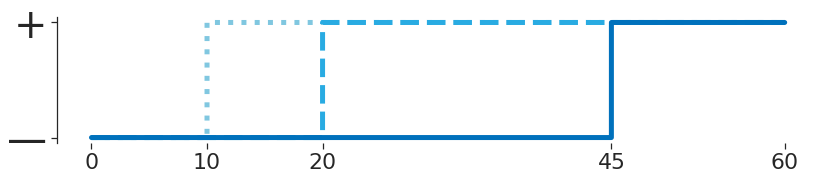

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))

linestyles = [':', '--', '-']

for blue_i, actual_val in enumerate([10, 20, 45]):
    step_plot_x = [0, actual_val - .001, actual_val + .001, 60]
    step_plot_y = [0, 0, 1, 1]
    
    sns.lineplot(x=step_plot_x, y=step_plot_y, color=sns.color_palette()[blue_i], ls=linestyles[blue_i])

# ax.legend(loc=(1.04, 0.4), fontsize=20, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xticks([0, 10, 20, 45, 60])
ax.set_yticks([0, 1])
ax.set_yticklabels(['—', '+'], fontsize=40)

plt.tight_layout()
fig.savefig(figure_dir + 'Co_01_StepPlot_Actual')
fig.savefig(figure_dir + 'Co_01_StepPlot_Actual.svg')
plt.show()

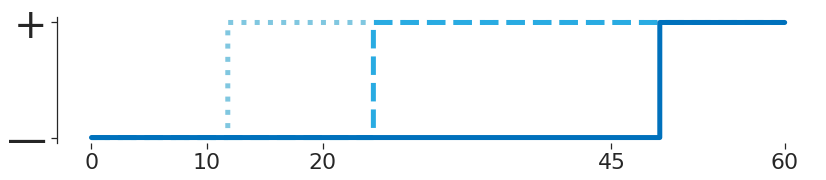

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))

linestyles = [':', '--', '-']

for blue_i, avg in enumerate(avgs):
    step_plot_x = [0, avg - .001, avg + .001, 60]
    step_plot_y = [0, 0, 1, 1]
    
    sns.lineplot(x=step_plot_x, y=step_plot_y, color=sns.color_palette()[blue_i], ls=linestyles[blue_i])

# ax.legend(loc=(1.04, 0.4), fontsize=20, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xticks([0, 10, 20, 45, 60])
ax.set_yticks([0, 1])
ax.set_yticklabels(['—', '+'], fontsize=40)

plt.tight_layout()
fig.savefig(figure_dir + 'Co_01_StepPlot_Predicted')
fig.savefig(figure_dir + 'Co_01_StepPlot_Predicted.svg')
plt.show()

# Plot Individual dNTP %s
(Not included in paper)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


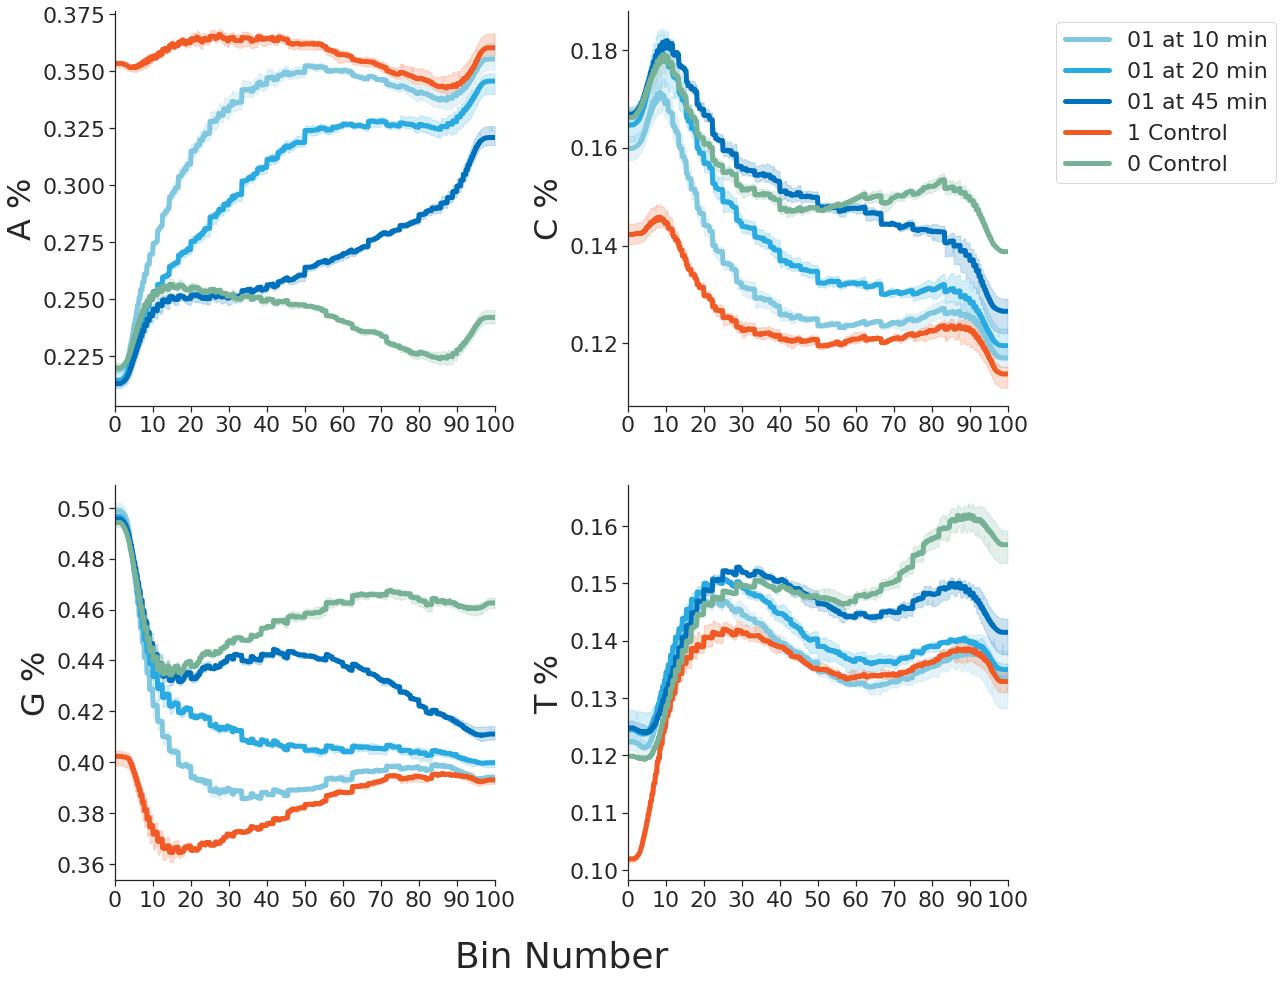

In [39]:
fig, axmatrix = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
seq_max = 1000

for i, base in enumerate(['A', 'C', 'G', 'T']):
    ax = axmatrix[int(np.floor(i / 2)), i % 2]
    
    if i == 1:
        legend = 'brief'
    else:
        legend = False
    
    ax = sns.lineplot(x='Bin Number', y='{} %'.format(base), hue='Condition',
                      data=data[data.Condition != 'No TdT Control'], ax=ax, legend=legend)
    
    if i == 1:
        ax.legend(bbox_to_anchor=(1.1,1), loc=2)

    ax.set_xlabel('')
    ax.set_ylabel('{} %'.format(base), fontsize=32)
    ax.set_xlim(1, seq_max)
    ax.set_xticks(range(0, seq_max + 100, 100))
    ax.set_xticklabels(range(0, 110, 10))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(labelleft=True, left=True, bottom=True)

fig.text(0.513, 0.05, 'Bin Number', ha='center', fontsize=36)

plt.subplots_adjust(wspace=.35)

fig.savefig(figure_dir + 'Co_01_Individual_Bases_Norm')
fig.savefig(figure_dir + 'Co_01_Individual_Bases_Norm.svg')
plt.show()